In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Benkyou/datasets ML/IRIS.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No null  values happy : )

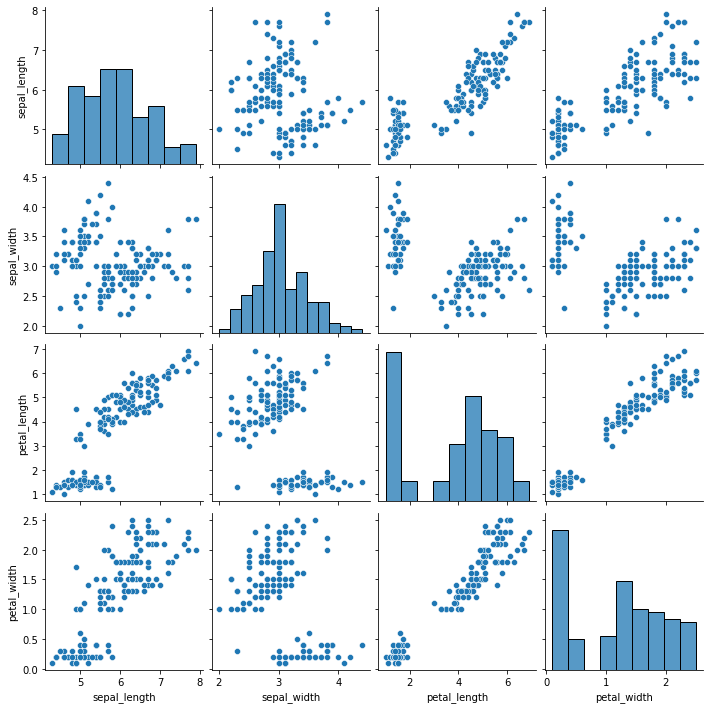

In [8]:
sns.pairplot(df)
plt.show()

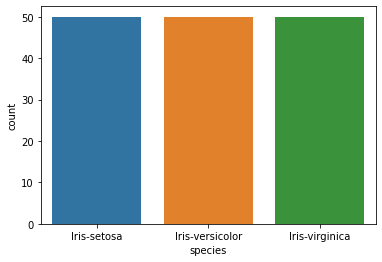

In [9]:
sns.countplot(df['species'])
plt.show()

we see that our Target species is in strings so we need to encode

In [10]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder

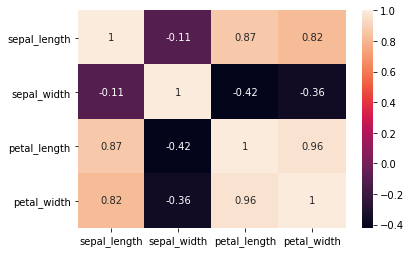

In [12]:

sns.heatmap(df.corr().round(3),annot=True)
plt.show()


we are not going to drop any columns

In [13]:
def split_test_train(x,y,train_size =0.80,seed=None):
  np.random.seed(seed)
  y=np.array(y)
  data=np.concatenate([x,y.reshape(-1,1)],axis=1)
  #in above(y) concatenates with x in with new column
  #data[:int(len(data)*train_size),-1:]) gives me y values
  np.random.shuffle(data)
  xtrain=data[:int(len(data)*train_size),:-1]
  ytrain=data[:int(len(data)*train_size),-1]
  xtest=data[int(len(data)*train_size):,:-1]
  ytest=data[int(len(data)*train_size):,-1]
  return xtrain,ytrain,xtest,ytest

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Train_test_split
x = df.drop(['species'],axis=1,inplace=False)
y= df['species']
xtrain,ytrain,xtest,ytest = split_test_train(x,y,train_size =0.80,seed=55)
#xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/4,random_state =42)
print('Train data shapes \nx =',xtrain.shape,'y= ',ytrain.shape,'\nTest data shapes\nx =',xtest.shape,'y =',ytest.shape)

Train data shapes 
x = (120, 4) y=  (120,) 
Test data shapes
x = (30, 4) y = (30,)


In [16]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [17]:
# dtree
from sklearn.tree import DecisionTreeClassifier as DTC
dtree = DTC(criterion='gini')
dtree.fit(xtrain,ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_pred=dtree.predict(xtest)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [19]:
dytest=ytest
dytest

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import classification_report as cfr 
from sklearn.metrics import roc_auc_score as roc_auc

In [21]:
print('ACCURACY = ',asc(dytest,y_pred)*100,'%')

ACCURACY =  100.0 %


**Naive Bayes**

In [22]:
class NaiveBayes:
    def fit(self,X,y):
        '''need mean variance for eachclass samples = rows ,feauture = column'''
        n_samples , n_feature = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        #init mean ,var ,prior prob
        self._mean = np.zeros((n_classes,n_feature),dtype = np.float64)
        self._var =  np.zeros((n_classes,n_feature),dtype = np.float64)
        self._priors = np.zeros((n_classes),dtype = np.float64)
        self._classes,_ =pd.factorize(self._classes)
        #for this im getting zeor division error 
        '''for i in range(len(self._classes)):
          if self._classes[i]== 0:
            self._classes[i] = 3'''


        for c in self._classes:
          X_c =X[c==y]
          self._mean[c,:] =X_c.mean(axis=0)
          self._var[c,:] =X_c.var(axis =0)
          self._prior = X_c.shape[0]/float(n_sample)
    
    def predict(self,X):
      '''predict class conditional'''
      y_pred =[self._predict(i) for i in X]
      return y_pred

    def _predict(self ,x):
      posteriors =[]

      for j,c in enumerate(self._classes):
        prior = np.log(self._priors[j])
        class_conditional = np.sum(np.log(self._density(j,x)))
        posterior =prior + class_conditional
        posterior.append(posteriors)

        return self._classes[np.argmax(posteriors)]
            
    def _density(self,class_index ,x):
      mean = self._mean[class_index]
      var =self._var[class_index]
      numerator = np.exp(-(x-mean)**2/(2*var))
      denomi =np.sqrt(2*np.pi*var)
      return numerator/denomi

        


In [23]:
data1 = df.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [25]:
data1['species'] = enc.fit_transform(data1['species'])

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
y2 =data1['species']

In [28]:
xtrain,ytrain,xtest,ytest = split_test_train(x,y2,train_size =0.80,seed=55)
#xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/4,random_state =42)
print('Train data shapes \nx =',xtrain.shape,'y= ',ytrain.shape,'\nTest data shapes\nx =',xtest.shape,'y =',ytest.shape)

Train data shapes 
x = (120, 4) y=  (120,) 
Test data shapes
x = (30, 4) y = (30,)


In [29]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
nb.predict(xtest)

array([1., 2., 1., 1., 0., 2., 1., 0., 1., 0., 1., 0., 1., 2., 2., 1., 1.,
       0., 2., 1., 1., 0., 2., 1., 1., 0., 1., 0., 2., 0.])

In [30]:
ytest

array([1., 2., 1., 1., 0., 2., 1., 0., 1., 0., 1., 0., 1., 2., 2., 1., 1.,
       0., 2., 1., 1., 0., 2., 1., 1., 0., 1., 0., 2., 0.])

In [31]:
data = df.copy()

In [32]:
data['species'],_ =pd.factorize(data['species'])

In [33]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
data1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
from sklearn.svm import SVC

In [36]:
svm = SVC()

In [37]:
svm.fit(x,y2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
svm.predict(xtest)

array([1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 2, 0])

In [39]:
print('Accuracy =',asc(ytest,np.array(svm.predict(xtest)))*100)

Accuracy = 100.0


In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNS

In [41]:
test_score ,train_score=[],[]
k_value =[]
for i in range(1,15):
  knn = KNS(i)
  knn.fit(xtrain,ytrain)
  train_score.append(knn.score(xtrain,ytrain)) 
  test_score.append(knn.score(xtest,ytest))
  k_value.append(i)
print('Accuracy=',round(max(test_score)*100,3),'% for K=',k_value[(test_score.index(max(test_score)))])

Accuracy= 100.0 % for K= 10


In [42]:
knn = KNS(10)

In [43]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [44]:
knn.predict(xtest)

array([1., 2., 1., 1., 0., 2., 1., 0., 1., 0., 1., 0., 1., 2., 2., 1., 1.,
       0., 2., 1., 1., 0., 2., 1., 1., 0., 1., 0., 2., 0.])

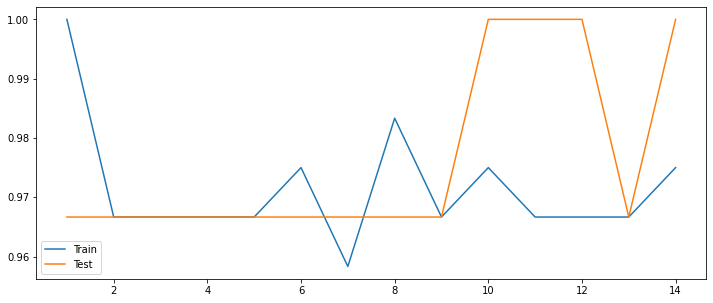

In [45]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,15),train_score , markers='*',label ='Train')
p =sns.lineplot(range(1,15),test_score, markers='o',label = 'Test')


In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [47]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [49]:
lgr.fit(xtrain,ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
metrics = pd.DataFrame([['Descion Tree',asc(dytest,y_pred)*100],['Naive Bayes',asc(ytest,np.array(nb.predict(xtest)))*100],['Support Vector Machine',asc(ytest,np.array(svm.predict(xtest)))*100],['KNN',asc(ytest,np.array(knn.predict(xtest)))*100],['RandomForestClassifier',asc(ytest,np.array(svm.predict(xtest)))*100],['LogisticRegression',asc(ytest,np.array(lgr.predict(xtest)))*100]],columns=['Model','Accuracy'])
metrics

,Model,Accuracy
0,Descion Tree,100.0
1,Naive Bayes,100.0
2,Support Vector Machine,100.0
3,KNN,100.0
4,RandomForestClassifier,100.0
5,LogisticRegression,100.0


In [52]:
print('Descion Tree')
print(cfr(dytest,y_pred))

Descion Tree
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

